In [2]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


###**Importing Libraries**

In [3]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
PALETTE = sns.color_palette("Set2")
import matplotlib.pyplot as plt
#from plotly.subplots import make_subplots/

#import plotly.graph_objects as go
#import plotly.express as px

%matplotlib inline
sns.set_palette("Greens_d")
from IPython.display import display
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

In [6]:
pip install kaleido

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


###**Reading Dataset**

In [7]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')

### **Visualization (Box and Hists)**

In [8]:
df_plot = df.copy()

In [9]:
df_plot.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

In [10]:
print(f"Number of Records in utilized dataset: {len(df_plot.index)}")

Number of Records in utilized dataset: 2240


In [11]:
print(f"Number of Attributes in utilized dataset: {len(df_plot.columns)}")

Number of Attributes in utilized dataset: 27


In [12]:
print(f"Number of Rows with null values in utilized dataset: {df_plot.isna().any(axis=1).sum()}")

Number of Rows with null values in utilized dataset: 24


In [13]:
print(f"Description of Attributes")
print("---------------------------")
df_plot.info()

Description of Attributes
---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null

In [14]:
estimated_df = df_plot.copy()
estimated_df['Income'].fillna((estimated_df['Income'].mean()), inplace=True)

In [15]:
print(f"Total number of non-null values for Income Attribute before Estimation: {df_plot['Income'].count()}")
print(f"Total number of non-null values for Income Attribute after Estimation: {estimated_df['Income'].count()}")

Total number of non-null values for Income Attribute before Estimation: 2216
Total number of non-null values for Income Attribute after Estimation: 2240


In [16]:
df = df_plot.dropna()

In [17]:
hist_cols = [col for col in df.columns.tolist() if df[col].dtype not in ['object']]
len(hist_cols)

24

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

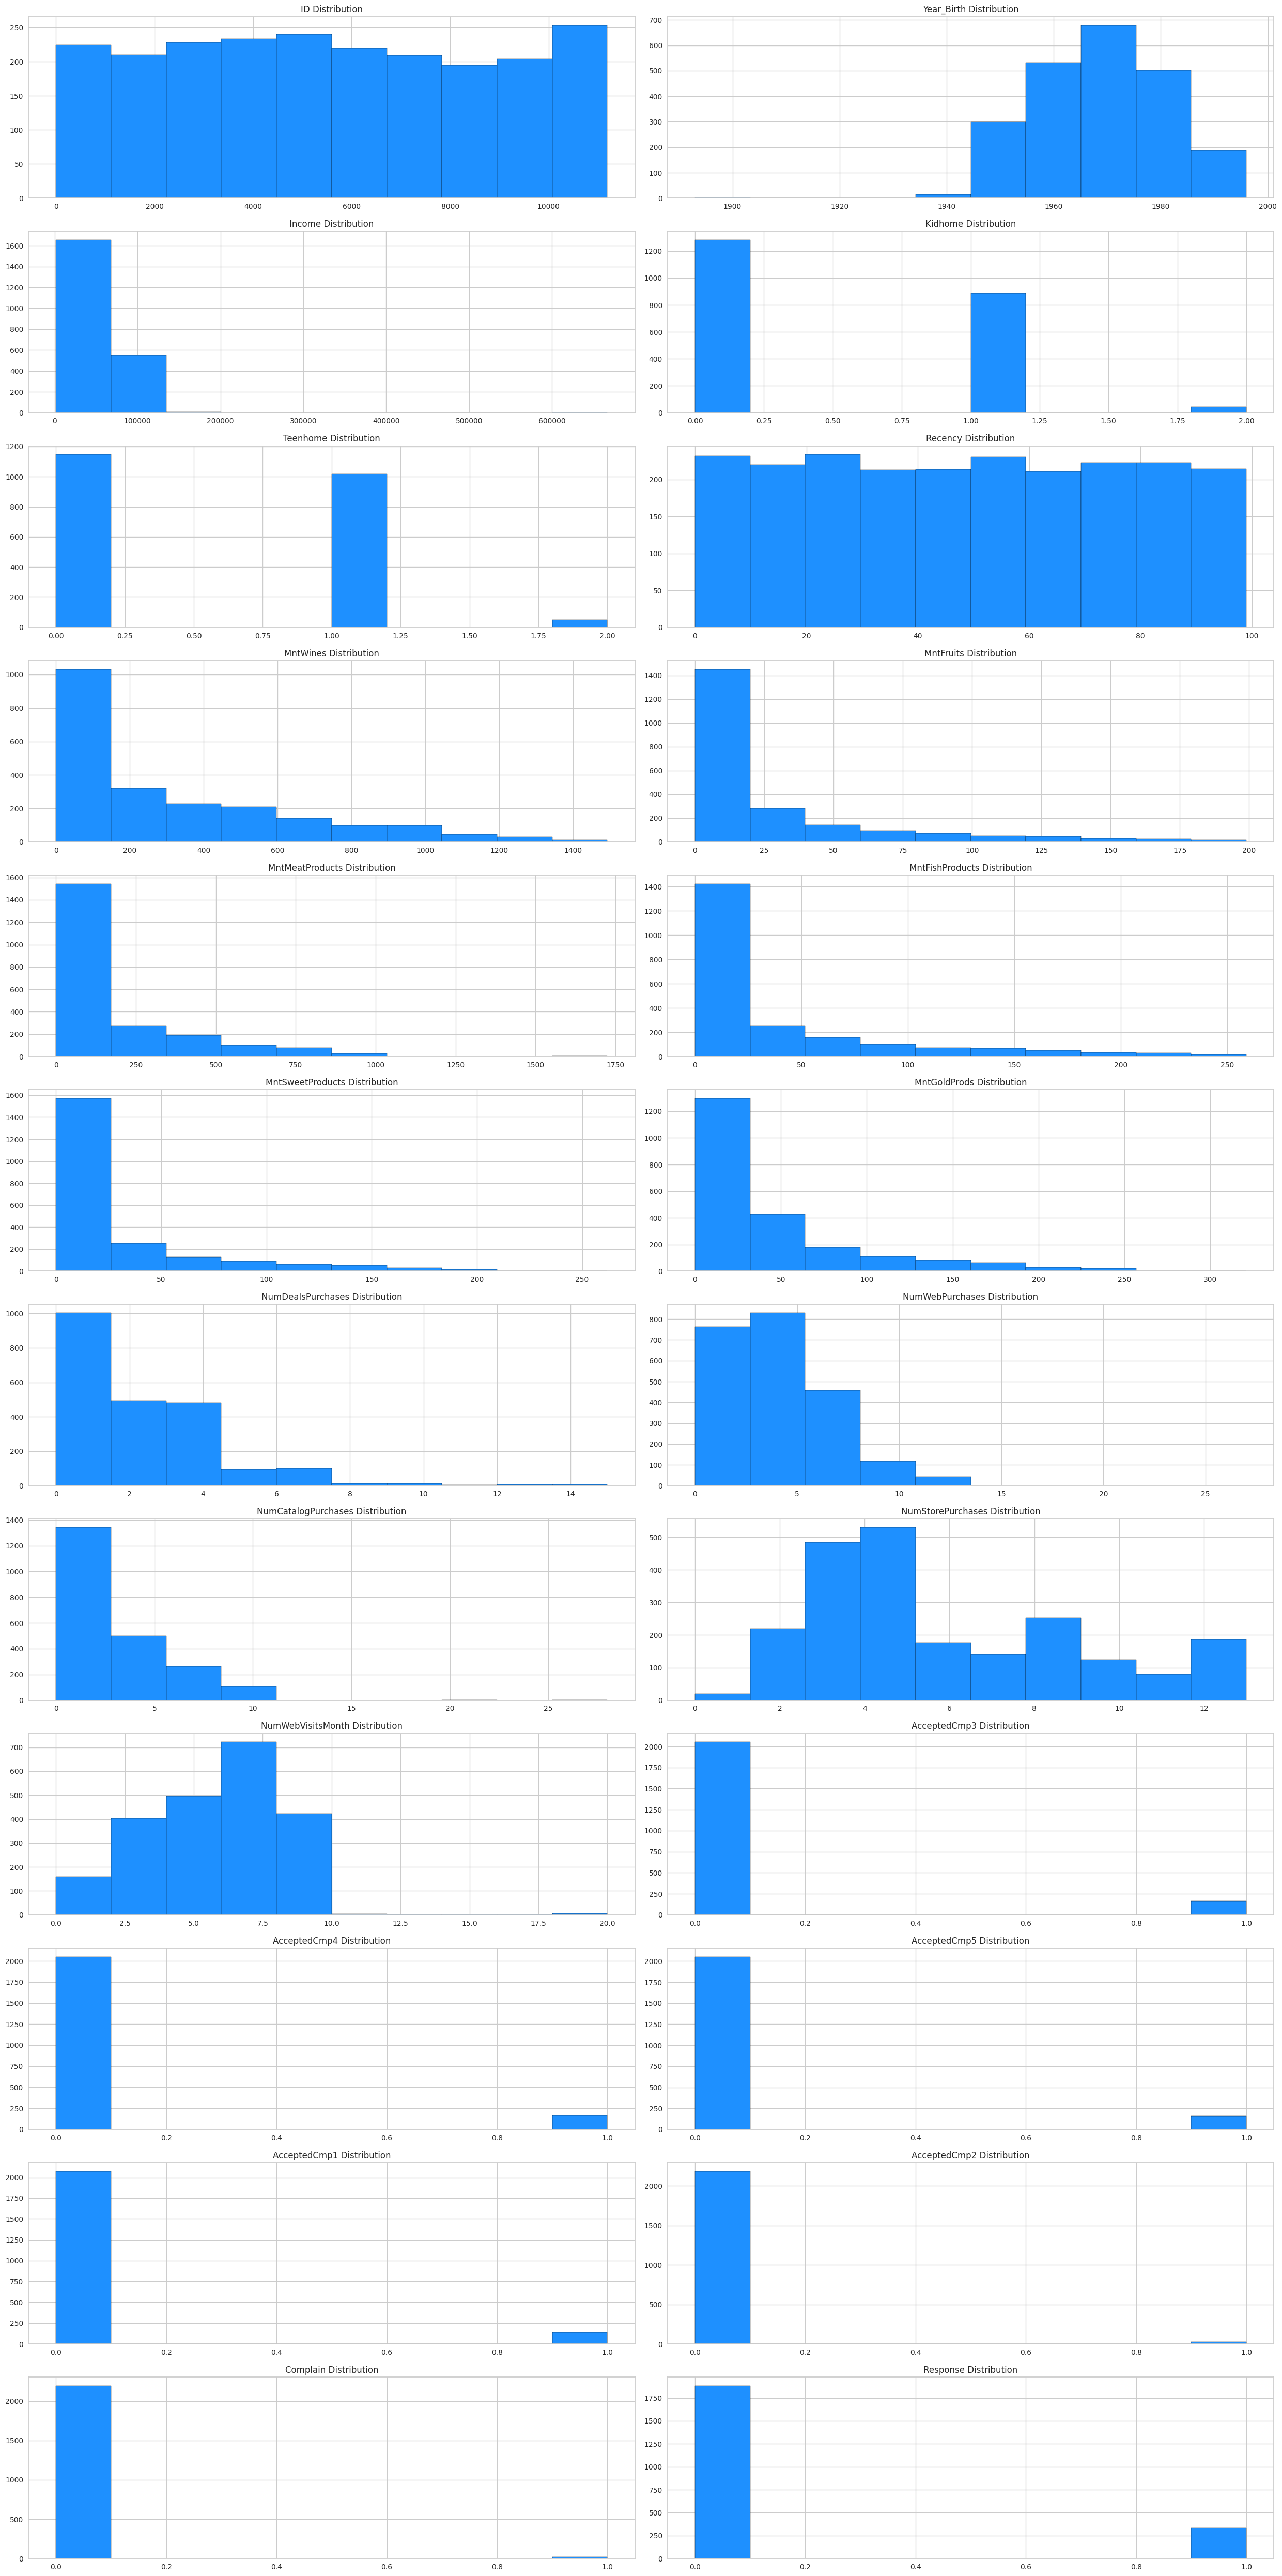

In [18]:
fig=plt.figure()
fig.set_size_inches(25, 50)
for i, col in enumerate(hist_cols):
  ax=fig.add_subplot(12, 2, i+1)
  df[col].hist(bins=10,ax=ax, color = 'dodgerblue', edgecolor = 'black')
  ax.set_title(col+" Distribution")
fig.tight_layout()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

<AxesSubplot: >

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

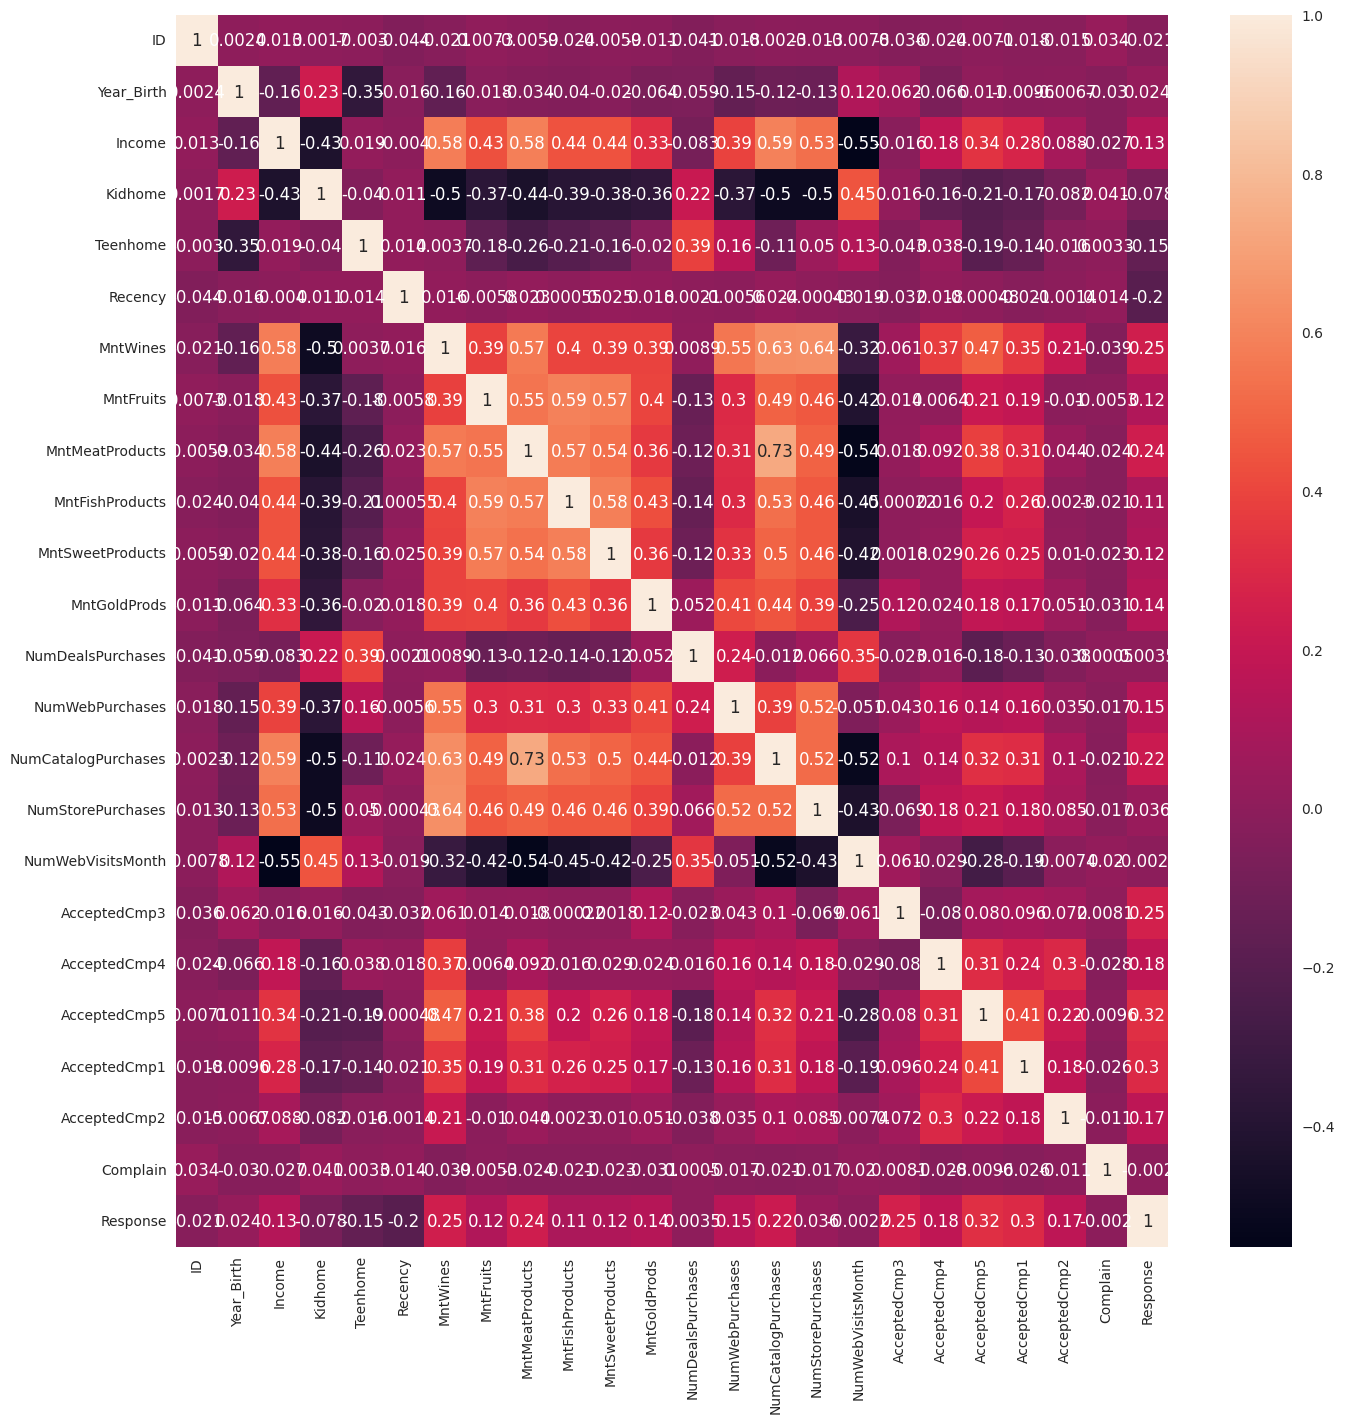

In [19]:
correlation = df.corr()
plt.figure(figsize=(16,16))
sns.heatmap(correlation, annot=True)

In [20]:
catg_cols = [col for col in df.columns.tolist() if df[col].dtype in ['object']]
print(catg_cols)

['Education', 'Marital_Status', 'Dt_Customer']


In [21]:
le = LabelEncoder()
for col in catg_cols:
  df[col] = df[[col]].apply(le.fit_transform)
  #df_subset[col] = df_subset[[col]].apply(le.fit_transform)

print("Dataset after encoding of Categorical Columns")
print("---------------------------------------------")
df

Dataset after encoding of Categorical Columns
---------------------------------------------


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,2,4,58138.0,0,0,80,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,2,4,46344.0,1,1,157,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,2,5,71613.0,0,0,444,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,2,5,26646.0,1,0,199,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,4,3,58293.0,1,0,390,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,3,61223.0,0,1,272,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,4,5,64014.0,2,1,207,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,2,2,56981.0,0,0,521,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,3,5,69245.0,0,1,500,8,428,...,5,10,3,0,0,0,0,0,0,0


In [22]:
del_cols = [ 'ID', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response', 'Dt_Customer', "Recency"]
df = df.drop(del_cols, axis=1)

### **Visualization (Feature Based)**
* Education vs Income
* Education vs Amount Spent in Categories
* Age Range

In [23]:
df_vis = pd.read_csv('marketing_campaign.csv', sep='\t', index_col='ID', parse_dates=['Dt_Customer'])

In [24]:
df_vis.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

In [25]:
df_vis[df_vis.duplicated(keep=False)].sort_values(by='Income')

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,,,,,,,,,,,,,,,,,,,,,
6864,1989,Master,Divorced,10979.0,0,0,2014-05-22,34,8,4,...,0,3,5,0,0,0,0,0,0,0
10617,1989,Master,Divorced,10979.0,0,0,2014-05-22,34,8,4,...,0,3,5,0,0,0,0,0,0,0
234,1979,Graduation,Divorced,15287.0,1,0,2012-10-10,60,1,2,...,1,2,7,1,0,0,0,0,0,1
10264,1979,Graduation,Divorced,15287.0,1,0,2012-10-10,60,1,2,...,1,2,7,1,0,0,0,0,0,1
8420,1970,2n Cycle,Married,15315.0,0,0,2013-03-08,27,7,4,...,0,4,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5536,1959,Graduation,Together,87771.0,0,1,2013-05-22,61,1492,38,...,10,4,6,0,1,1,1,1,0,1
6024,1953,Graduation,Together,94384.0,0,0,2013-04-03,62,1111,24,...,8,5,2,0,1,1,1,0,0,1
5386,1953,Graduation,Together,94384.0,0,0,2013-04-03,62,1111,24,...,8,5,2,0,1,1,1,0,0,1


In [26]:
df_vis[df_vis.duplicated(keep='first')]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,,,,,,,,,,,,,,,,,,,,,
4119,1963,Master,Together,38620.0,0,0,2013-11-05,56,112,17,...,5,3,3,0,0,0,0,0,0,0
6935,1951,2n Cycle,Married,78497.0,0,0,2013-01-12,44,207,26,...,7,12,2,0,0,0,1,0,0,0
10144,1976,Graduation,Together,51369.0,0,1,2012-10-25,84,297,7,...,2,4,8,0,0,0,0,0,0,0
8652,1946,Graduation,Together,37760.0,0,0,2012-08-31,20,84,5,...,1,6,7,0,0,0,0,0,0,0
933,1978,PhD,Married,37717.0,1,0,2012-11-23,31,9,0,...,0,2,9,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,1978,Graduation,Together,22775.0,1,0,2013-06-19,40,5,1,...,0,2,8,0,0,0,0,0,0,0
7366,1982,Master,Single,75777.0,0,0,2013-04-07,12,712,26,...,6,11,1,0,1,1,0,0,0,1
4749,1968,Graduation,Together,58554.0,1,1,2012-09-26,55,368,24,...,2,6,7,0,0,0,0,0,0,0


In [27]:
df_vis.drop_duplicates(inplace=True)

In [28]:
df_vis

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,...,10,4,7,0,0,0,0,0,0,1
2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,...,1,2,5,0,0,0,0,0,0,0
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,2,10,4,0,0,0,0,0,0,0
6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,...,0,4,6,0,0,0,0,0,0,0
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9432,1977,Graduation,Together,666666.0,1,0,2013-02-06,23,9,14,...,1,3,6,0,0,0,0,0,0,0
10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,3,4,5,0,0,0,0,0,0,0
7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,3,13,6,0,1,0,0,0,0,0


In [29]:
df_vis['Income'].fillna((df_vis['Income'].mean()), inplace=True)

In [30]:
df_vis['Education'].replace(['2n Cycle'], ['Master'], inplace=True)

In [31]:
df_vis['Education'].value_counts()

Graduation    1030
Master         529
PhD            450
Basic           49
Name: Education, dtype: int64

In [32]:
df_vis['TotalAcceptedCmp'] = df_vis['AcceptedCmp1'] + df_vis['AcceptedCmp2'] + df_vis['AcceptedCmp3'] + df_vis['AcceptedCmp4'] + df_vis['AcceptedCmp5'] + df_vis['Response']

Basic Degree Income is lower than others.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

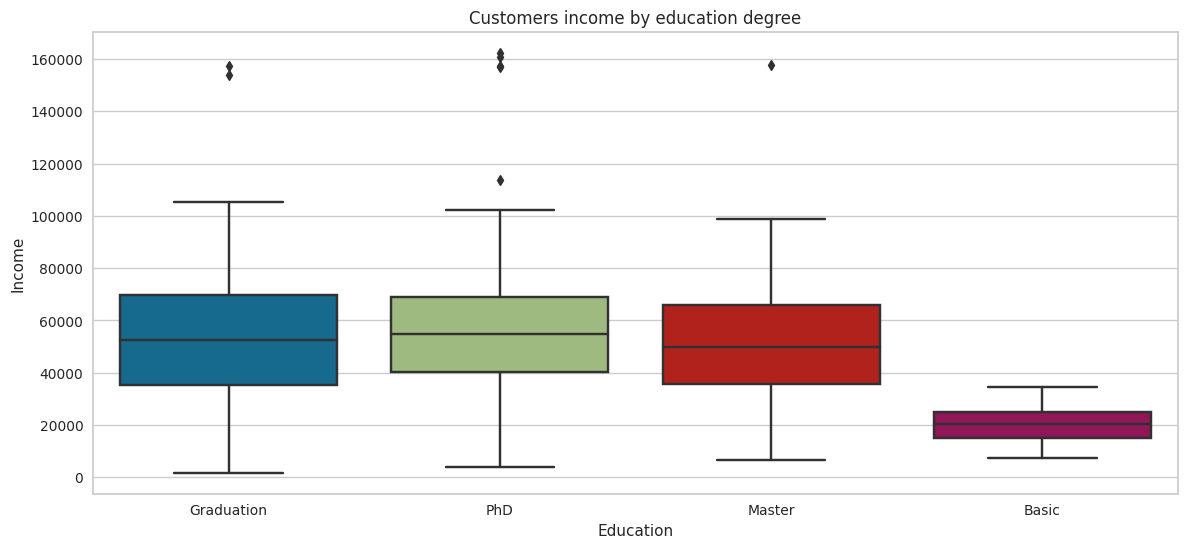

In [33]:
#Figure 1
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_vis.query('Income < 500000'), x='Education', y='Income')
plt.title('Customers income by education degree')
plt.savefig('Vis1.png')
plt.show()

In [34]:
total = df_vis.groupby('TotalAcceptedCmp').sum().reset_index()

There are no Basic degree customers, who accepted more than 2 campaigns.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

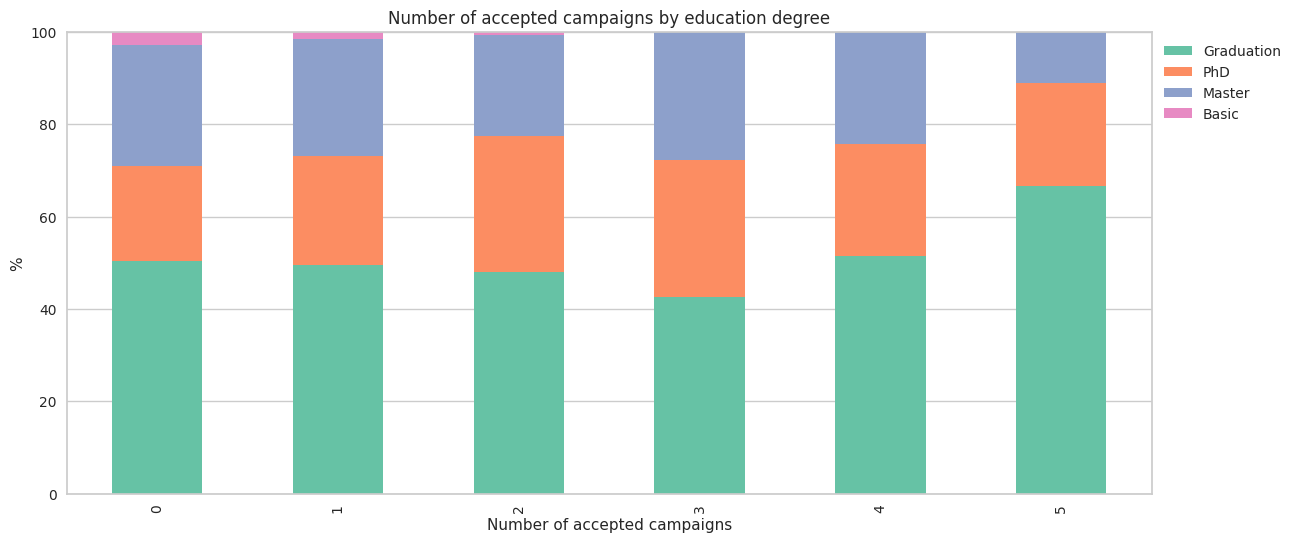

In [35]:
#Figure 2
plt.figure(figsize=(14, 6))
accepted_data = pd.Series({i: 0 for i in range(6)})
temp_data = accepted_data
for i, value in enumerate(df_vis['Education'].unique()):
    temp_data += accepted_data
    accepted_data = (df_vis.query(f'Education == "{value}"')['TotalAcceptedCmp'].value_counts()
                                                                           .divide(df_vis['TotalAcceptedCmp'].value_counts())
                                                                           .multiply(100))
    ax = accepted_data.plot(kind='bar', bottom=temp_data, color=PALETTE[i], label=f'{value}')

ax.set_xticklabels(ax.get_xticklabels())
plt.title('Number of accepted campaigns by education degree')
plt.xlabel('Number of accepted campaigns')
plt.ylabel('%')
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('Vis2.png')
plt.show()

In [36]:
df_vis['Age'] = 2021 - df_vis["Year_Birth"]

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

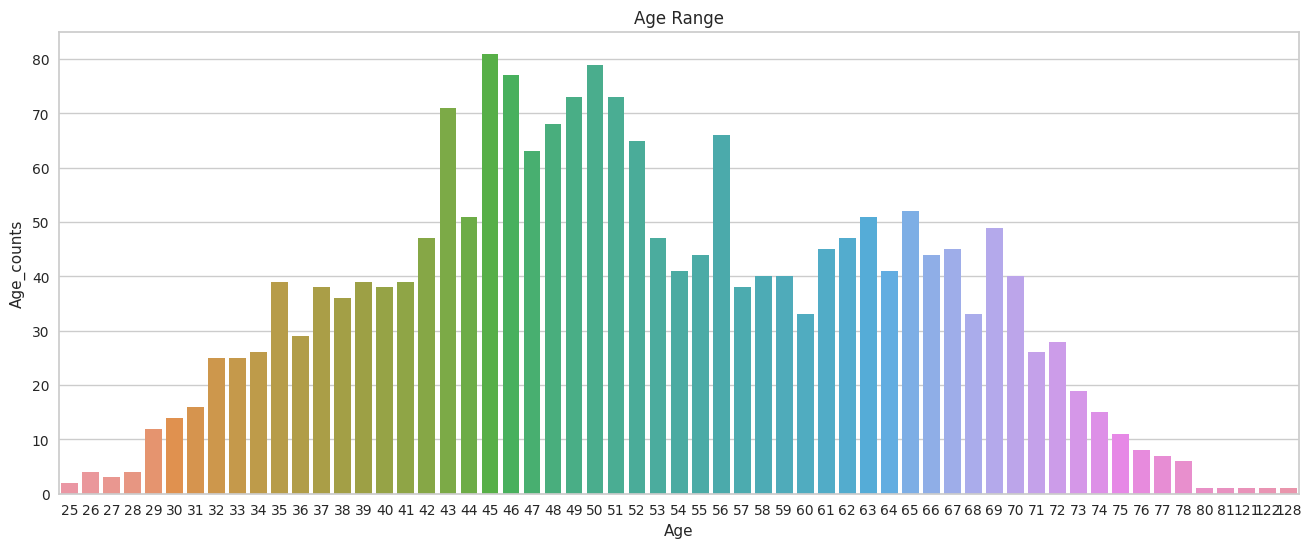

In [37]:
#Figure 3
age = df_vis["Age"].value_counts()
plt.figure(figsize=(16,6))
sns.barplot(x=age.index,y=age.values)
plt.xlabel("Age")
plt.ylabel("Age_counts")
plt.title("Age Range")
plt.savefig('Vis3.png')
plt.show()

###**For Income Prediction**

In [38]:
data_types_dict = {'Dt_Customer': object}

df_vis = df_vis.astype(data_types_dict)

In [39]:
df_subset = df_plot.merge(df_vis, how='left', indicator=True)   #For later income prediction

In [40]:
df_subset = df_subset.loc[df_subset['_merge']=='left_only']

In [41]:
df_subset.drop(columns=['_merge'], inplace=True)

In [42]:
df_subset["Marital_Status"]=df_subset["Marital_Status"].replace({"Married":"Couple", 
                                                                 "Together":"Couple", "Absurd":"Single", "Widow":"Single", "YOLO":"Single", "Divorced":"Single"})

In [43]:
df_subset["Education"]=df_subset["Education"].replace({"Basic":"Undergraduate",
                                                       "2n Cycle":"Postgraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [44]:
df_subset.drop(columns=['Income'], inplace=True)

In [45]:
del_cols = [ 'ID', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response', 'Dt_Customer', "Recency"]

In [46]:
df_subset = df_subset.drop(del_cols, axis=1)

In [47]:
df_subset

,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalAcceptedCmp,Age
0,1957,Graduate,Single,0,0,635,88,546,172,88,88,3,8,10,4,7,NaN,NaN
1,1954,Graduate,Single,1,1,11,1,6,2,1,6,2,1,1,2,5,NaN,NaN
2,1965,Graduate,Couple,0,0,426,49,127,111,21,42,1,8,2,10,4,NaN,NaN
3,1984,Graduate,Couple,1,0,11,4,20,10,3,5,2,2,0,4,6,NaN,NaN
4,1981,Postgraduate,Couple,1,0,173,43,118,46,27,15,5,5,3,6,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduate,Couple,0,1,709,43,182,42,118,247,2,9,3,4,5,NaN,NaN
2236,1946,Postgraduate,Couple,2,1,406,0,30,0,0,8,7,8,2,5,7,NaN,NaN
2237,1981,Graduate,Single,0,0,908,48,217,32,12,24,1,2,3,13,6,NaN,NaN
2238,1956,Postgraduate,Couple,0,1,428,30,214,80,30,61,2,6,5,10,3,NaN,NaN


### **Feature Extraction**

In [48]:
df["Marital_Status"]=df["Marital_Status"].replace({"Married":"Couple", 
                                                   "Together":"Couple", 
                                                   "Absurd":"Single", 
                                                   "Widow":"Single", 
                                                   "YOLO":"Single", 
                                                   "Divorced":"Single", 
                                                   'Alone':'Single'})

In [49]:
df["Education"]=df["Education"].replace({"Basic":"Undergraduate",
                                         "2n Cycle":"Postgraduate", 
                                         "Graduation":"Graduate", 
                                         "Master":"Postgraduate", 
                                         "PhD":"Postgraduate"})

In [50]:
df["Expenditure"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

In [51]:
cols = ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
        'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases']

In [52]:
extracted_df = df[cols]

In [53]:
for x in extracted_df.columns:
    print(x, extracted_df[x].dtype)

Year_Birth int64
Education int64
Marital_Status int64
Income float64
Kidhome int64
Teenhome int64
MntWines int64
MntFruits int64
MntMeatProducts int64
MntFishProducts int64
MntSweetProducts int64
MntGoldProds int64
NumWebPurchases int64
NumCatalogPurchases int64
NumStorePurchases int64


### **K-Means**

K-Means is a prototype based, partitional clustering technique that seeks a user-specified number of clusters, K, represented by their centroids.

#### **Case 1**
##### **Obtained Clusters : 4**
##### **Silhouette Score : 0.5412**
##### **Process:**
* NaN values dropped
* Marital_Status – Molded into two categories: Single/Couple
* Education – Molded into three categories: UG/G/PG
* Scaling has not been used

In [54]:
catg_cols = [col for col in extracted_df.columns.tolist() if extracted_df[col].dtype in ['object']]
print(catg_cols)

[]


In [55]:
le = LabelEncoder()
for col in catg_cols:
  extracted_df[col] = extracted_df[[col]].apply(le.fit_transform)
  #df_subset[col] = df_subset[[col]].apply(le.fit_transform)

print("Dataset after encoding of Categorical Columns")
print("---------------------------------------------")
extracted_df

Dataset after encoding of Categorical Columns
---------------------------------------------


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,1957,2,4,58138.0,0,0,635,88,546,172,88,88,8,10,4
1,1954,2,4,46344.0,1,1,11,1,6,2,1,6,1,1,2
2,1965,2,5,71613.0,0,0,426,49,127,111,21,42,8,2,10
3,1984,2,5,26646.0,1,0,11,4,20,10,3,5,2,0,4
4,1981,4,3,58293.0,1,0,173,43,118,46,27,15,5,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,2,3,61223.0,0,1,709,43,182,42,118,247,9,3,4
2236,1946,4,5,64014.0,2,1,406,0,30,0,0,8,8,2,5
2237,1981,2,2,56981.0,0,0,908,48,217,32,12,24,2,3,13
2238,1956,3,5,69245.0,0,1,428,30,214,80,30,61,6,5,10


In [56]:
values1 = extracted_df.values
values1

array([[1.957e+03, 2.000e+00, 4.000e+00, ..., 8.000e+00, 1.000e+01,
        4.000e+00],
       [1.954e+03, 2.000e+00, 4.000e+00, ..., 1.000e+00, 1.000e+00,
        2.000e+00],
       [1.965e+03, 2.000e+00, 5.000e+00, ..., 8.000e+00, 2.000e+00,
        1.000e+01],
       ...,
       [1.981e+03, 2.000e+00, 2.000e+00, ..., 2.000e+00, 3.000e+00,
        1.300e+01],
       [1.956e+03, 3.000e+00, 5.000e+00, ..., 6.000e+00, 5.000e+00,
        1.000e+01],
       [1.954e+03, 4.000e+00, 3.000e+00, ..., 3.000e+00, 1.000e+00,
        4.000e+00]])

In [57]:
from sklearnex import patch_sklearn
# The names match scikit-learn estimators
patch_sklearn("KMEANS")

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [58]:
import daal4py.sklearn
daal4py.sklearn.patch_sklearn()

Intel(R) oneAPI Data Analytics Library solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

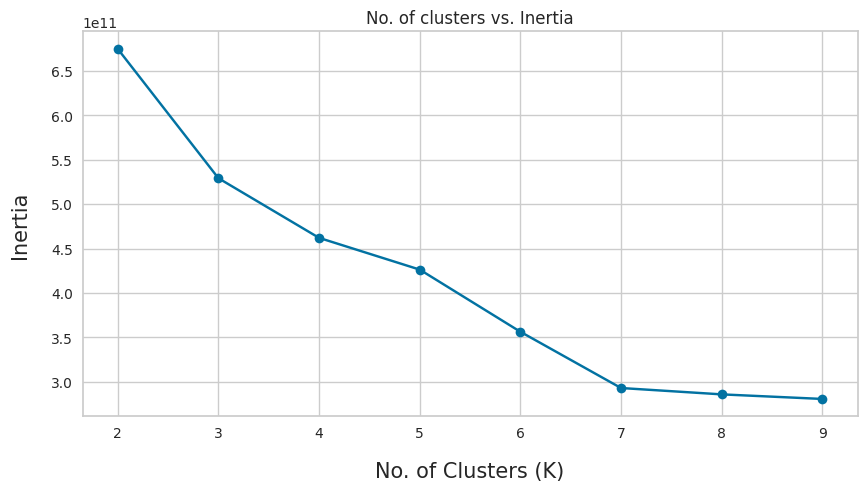

In [59]:
import daal4py as d4p

options = range(2,10)
kval = []
q = []
for n in options:
    initrain = d4p.kmeans_init(n)
    initrain_result = initrain.compute(values1)
    algo = d4p.kmeans(nClusters=n, maxIterations =10 , accuracyThreshold =1, gamma =10)
    # compute the clusters/centroids
    result = algo.compute(values1, initrain_result.centroids)
    kval.append(result.objectiveFunction)


for x in range(len(kval)):
    q.append(kval[x][0][0])

plt.figure(figsize=(10,5))    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, q, '-o')
plt.xticks( fontsize=10)
plt.yticks( fontsize=10)
plt.xlabel('No. of Clusters (K)', fontsize=15, labelpad=15)
plt.ylabel('Inertia', fontsize=15, labelpad=15);

In [60]:
initrain = d4p.kmeans_init(5)
initrain_result = initrain.compute(values1)
algo = d4p.kmeans(nClusters=5, maxIterations =10 , accuracyThreshold =1, gamma =10)
result = algo.compute(values1, initrain_result.centroids)

The elbow can be seen at K=5, thus we will be creating 5 clusters.

In [61]:
clustered_df1 = extracted_df.copy()
clustered_df1['Class'] = result.assignments
clustered_df1

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Class
0,1957,2,4,58138.0,0,0,635,88,546,172,88,88,8,10,4,0
1,1954,2,4,46344.0,1,1,11,1,6,2,1,6,1,1,2,0
2,1965,2,5,71613.0,0,0,426,49,127,111,21,42,8,2,10,4
3,1984,2,5,26646.0,1,0,11,4,20,10,3,5,2,0,4,3
4,1981,4,3,58293.0,1,0,173,43,118,46,27,15,5,3,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,2,3,61223.0,0,1,709,43,182,42,118,247,9,3,4,0
2236,1946,4,5,64014.0,2,1,406,0,30,0,0,8,8,2,5,4
2237,1981,2,2,56981.0,0,0,908,48,217,32,12,24,2,3,13,0
2238,1956,3,5,69245.0,0,1,428,30,214,80,30,61,6,5,10,4


In [62]:
clustered_df1.groupby('Class').count()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Class,,,,,,,,,,,,,,,
0,523,523,523,523,523,523,523,523,523,523,523,523,523,523,523
1,559,559,559,559,559,559,559,559,559,559,559,559,559,559,559
2,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193
3,353,353,353,353,353,353,353,353,353,353,353,353,353,353,353
4,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588


In [63]:
from sklearn import metrics 
metrics.silhouette_score(extracted_df, result.assignments) 


0.5071584461661178

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

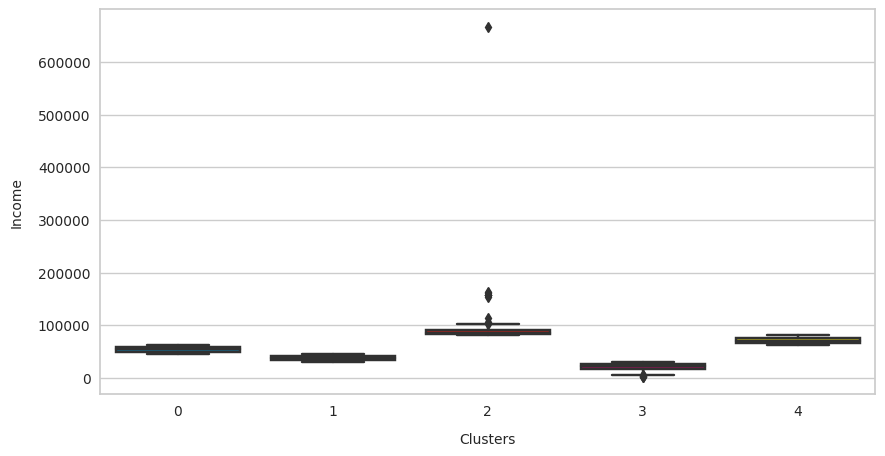

In [64]:
plt.figure(figsize=(10,5))

sns.boxplot(data=clustered_df1, x='Class', y = 'Income');
plt.xlabel('Clusters', fontsize=10, labelpad=10)
plt.ylabel('Income', fontsize=10, labelpad=10);

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

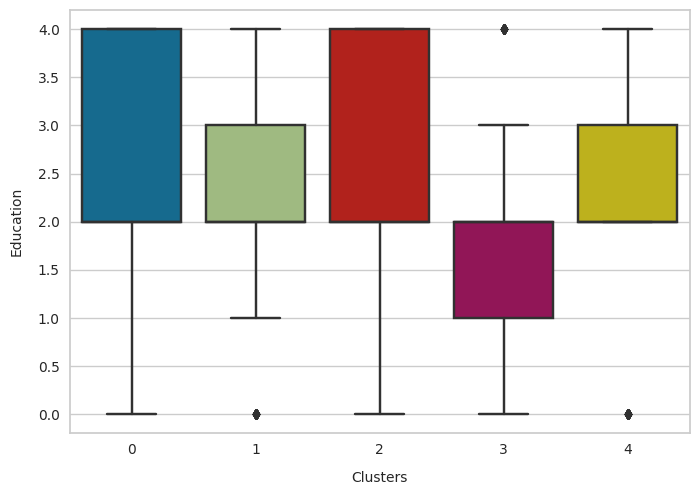

In [65]:
sns.boxplot(data=clustered_df1, x='Class', y = 'Education');
plt.xlabel('Clusters', fontsize=10, labelpad=10)
plt.ylabel('Education', fontsize=10, labelpad=10);

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

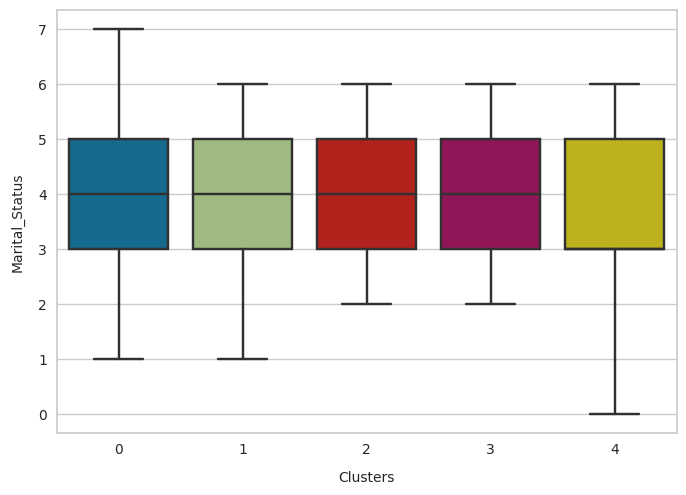

In [66]:
sns.boxplot(data=clustered_df1, x='Class', y = 'Marital_Status');
plt.xlabel('Clusters', fontsize=10, labelpad=10)
plt.ylabel('Marital_Status', fontsize=10, labelpad=10);

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

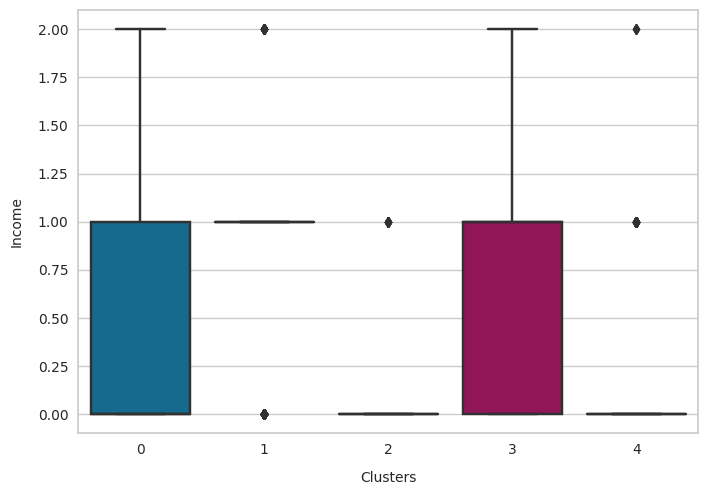

In [67]:
sns.boxplot(data=clustered_df1, x='Class', y = 'Kidhome');
plt.xlabel('Clusters', fontsize=10, labelpad=10)
plt.ylabel('Income', fontsize=10, labelpad=10);

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

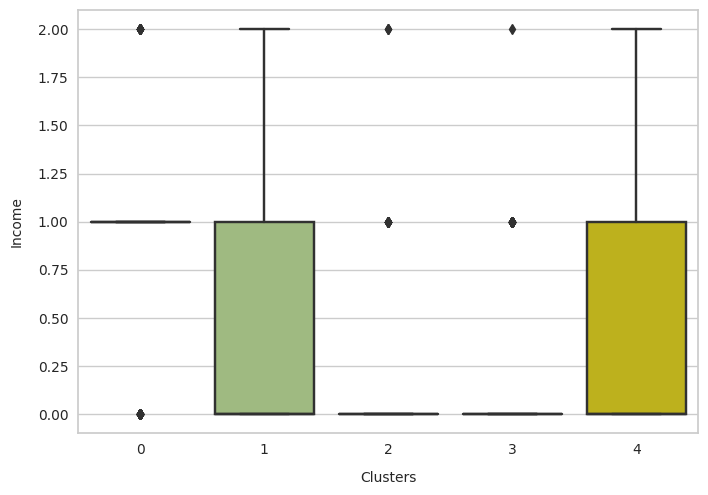

In [68]:
sns.boxplot(data=clustered_df1, x='Class', y = 'Teenhome');
plt.xlabel('Clusters', fontsize=10, labelpad=10)
plt.ylabel('Income', fontsize=10, labelpad=10);

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

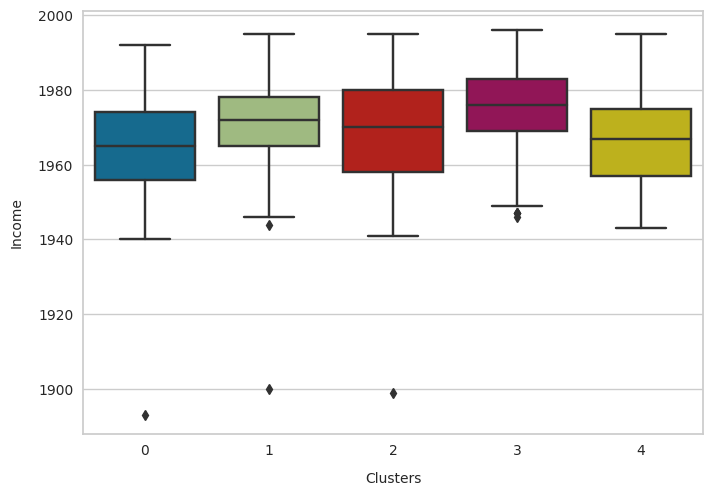

In [69]:
sns.boxplot(data=clustered_df1, x='Class', y = 'Year_Birth');
plt.xlabel('Clusters', fontsize=10, labelpad=10)
plt.ylabel('Income', fontsize=10, labelpad=10);

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

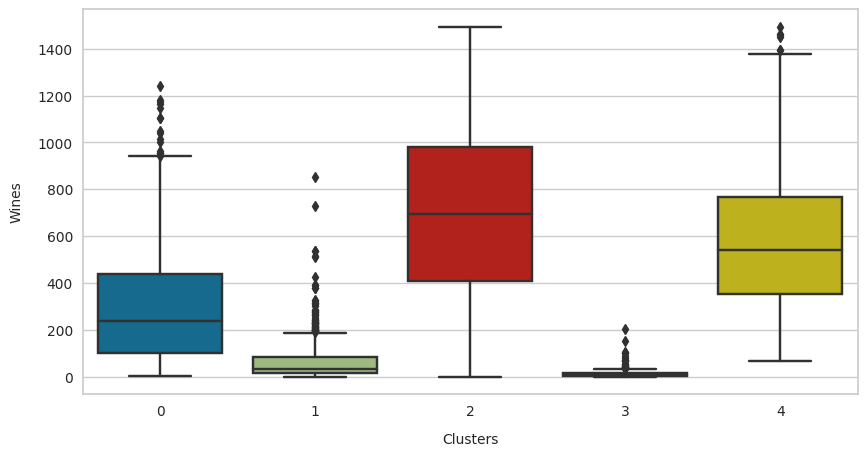

In [70]:
plt.figure(figsize=(10,5))
sns.boxplot(data=clustered_df1, x='Class', y = 'MntWines');
plt.xlabel('Clusters', fontsize=10, labelpad=10)
plt.ylabel('Wines', fontsize=10, labelpad=10);

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

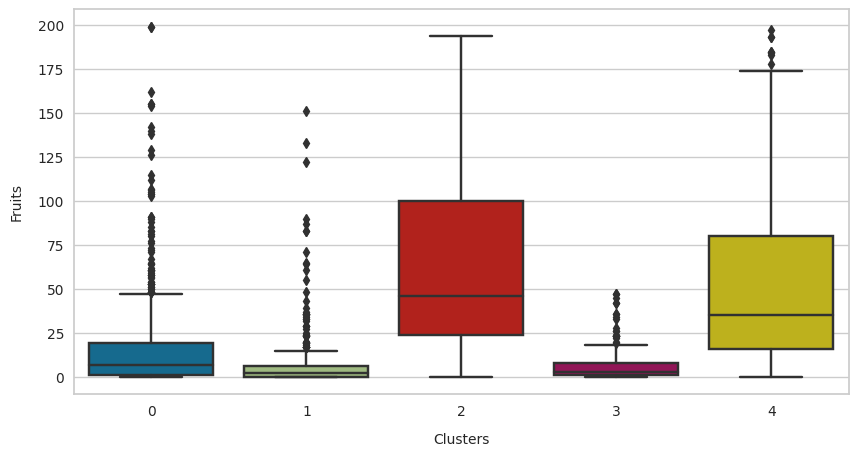

In [71]:
plt.figure(figsize=(10,5))
sns.boxplot(data=clustered_df1, x='Class', y = 'MntFruits');
plt.xlabel('Clusters', fontsize=10, labelpad=10)
plt.ylabel('Fruits', fontsize=10, labelpad=10);

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

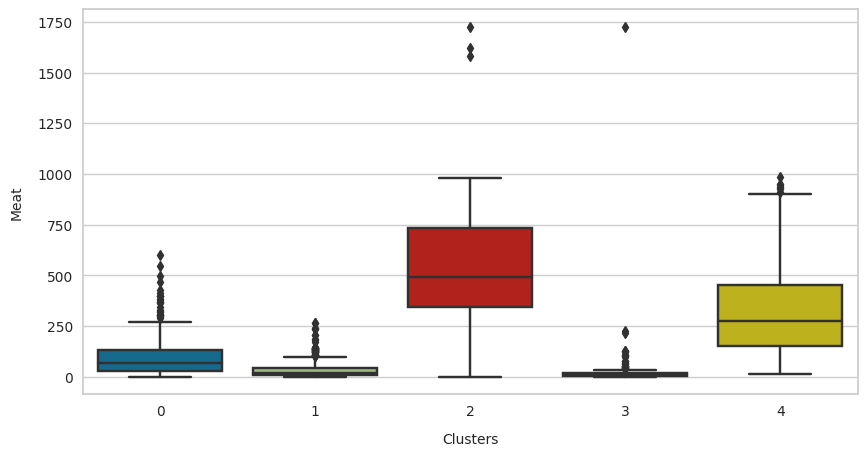

In [72]:

plt.figure(figsize=(10,5))
sns.boxplot(data=clustered_df1, x='Class', y = 'MntMeatProducts');
plt.xlabel('Clusters', fontsize=10, labelpad=10)
plt.ylabel('Meat', fontsize=10, labelpad=10);

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

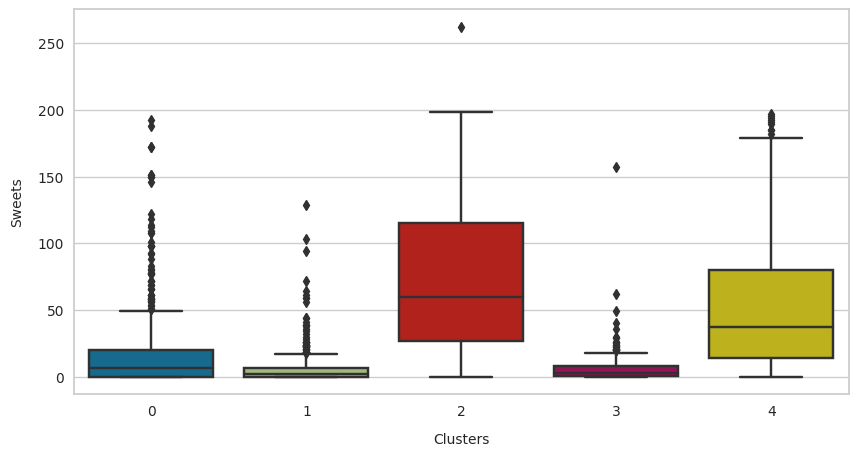

In [73]:
plt.figure(figsize=(10,5))

sns.boxplot(data=clustered_df1, x='Class', y = 'MntSweetProducts');
plt.xlabel('Clusters', fontsize=10, labelpad=10)
plt.ylabel('Sweets', fontsize=10, labelpad=10);

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

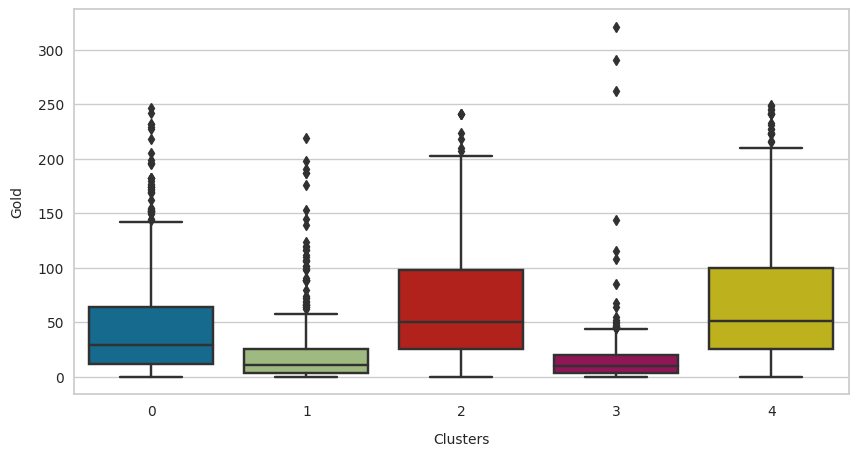

In [74]:
plt.figure(figsize=(10,5))

sns.boxplot(data=clustered_df1, x='Class', y = 'MntGoldProds');
plt.xlabel('Clusters', fontsize=10, labelpad=10)
plt.ylabel('Gold', fontsize=10, labelpad=10);

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

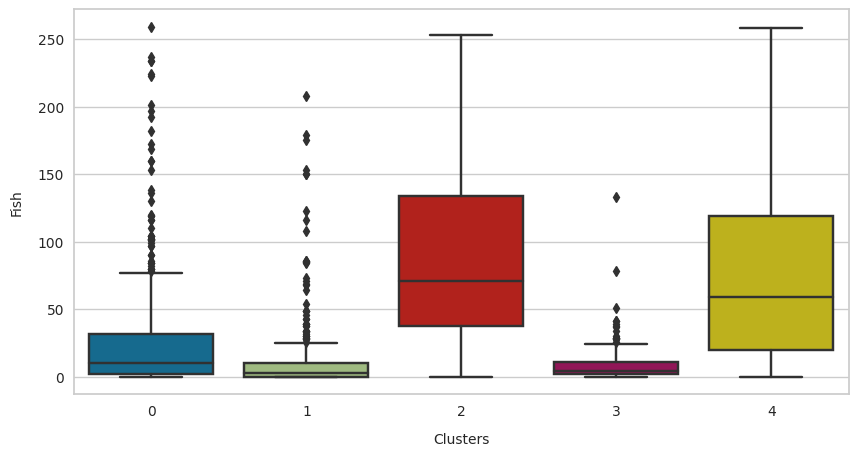

In [75]:
plt.figure(figsize=(10,5))

sns.boxplot(data=clustered_df1, x='Class', y = 'MntFishProducts');
plt.xlabel('Clusters', fontsize=10, labelpad=10)
plt.ylabel('Fish', fontsize=10, labelpad=10);

#### **Case 2**
##### **Obtained Clusters : 3**
##### **Silhouette Score : 0.6057**
##### **Process:**
* NaN values dropped
* Expenditure – Sum of amount spent on all products
* Marital_Status – Molded into two categories: Single/Couple
* Education – Molded into three categories: UG/G/PG
* Scaling has not been used

In [76]:
values6 = df.values
print(values6)

[[1957.    2.    4. ...    4.    7. 1617.]
 [1954.    2.    4. ...    2.    5.   27.]
 [1965.    2.    5. ...   10.    4.  776.]
 ...
 [1981.    2.    2. ...   13.    6. 1241.]
 [1956.    3.    5. ...   10.    3.  843.]
 [1954.    4.    3. ...    4.    7.  172.]]


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

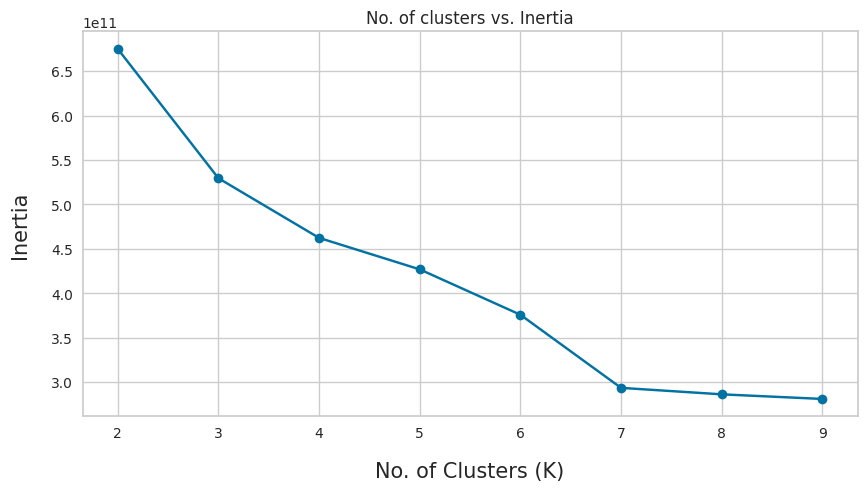

In [77]:
import daal4py as d4p

options = range(2,10)
kval = []
q = []
for n in options:
    initrain = d4p.kmeans_init(n)
    initrain_result = initrain.compute(values6)
    algo = d4p.kmeans(nClusters=n, maxIterations =10 , accuracyThreshold =1, gamma =10)
    # compute the clusters/centroids
    result = algo.compute(values6, initrain_result.centroids)
    kval.append(result.objectiveFunction)


for x in range(len(kval)):
    q.append(kval[x][0][0])

plt.figure(figsize=(10,5))    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, q, '-o')
plt.xticks( fontsize=10)
plt.yticks( fontsize=10)
plt.xlabel('No. of Clusters (K)', fontsize=15, labelpad=15)
plt.ylabel('Inertia', fontsize=15, labelpad=15);

In [78]:
initrain = d4p.kmeans_init(4)
initrain_result = initrain.compute(values6)
algo = d4p.kmeans(nClusters=4, maxIterations =10 , accuracyThreshold =1, gamma =10)
    # compute the clusters/centroids
result = algo.compute(values6, initrain_result.centroids)


In [79]:
clustered_df6 = df.copy()
clustered_df6['Class'] = result.assignments
clustered_df6

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Expenditure,Class
0,1957,2,4,58138.0,0,0,635,88,546,172,88,88,3,8,10,4,7,1617,0
1,1954,2,4,46344.0,1,1,11,1,6,2,1,6,2,1,1,2,5,27,1
2,1965,2,5,71613.0,0,0,426,49,127,111,21,42,1,8,2,10,4,776,0
3,1984,2,5,26646.0,1,0,11,4,20,10,3,5,2,2,0,4,6,53,3
4,1981,4,3,58293.0,1,0,173,43,118,46,27,15,5,5,3,6,5,422,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,2,3,61223.0,0,1,709,43,182,42,118,247,2,9,3,4,5,1341,0
2236,1946,4,5,64014.0,2,1,406,0,30,0,0,8,7,8,2,5,7,444,0
2237,1981,2,2,56981.0,0,0,908,48,217,32,12,24,1,2,3,13,6,1241,0
2238,1956,3,5,69245.0,0,1,428,30,214,80,30,61,2,6,5,10,3,843,0


In [80]:
clustered_df6.groupby('Class').size()

Class
0    692
1    684
2    380
3    460
dtype: int64

In [81]:
metrics.silhouette_score(df, result.assignments) 

0.5214713388958485

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

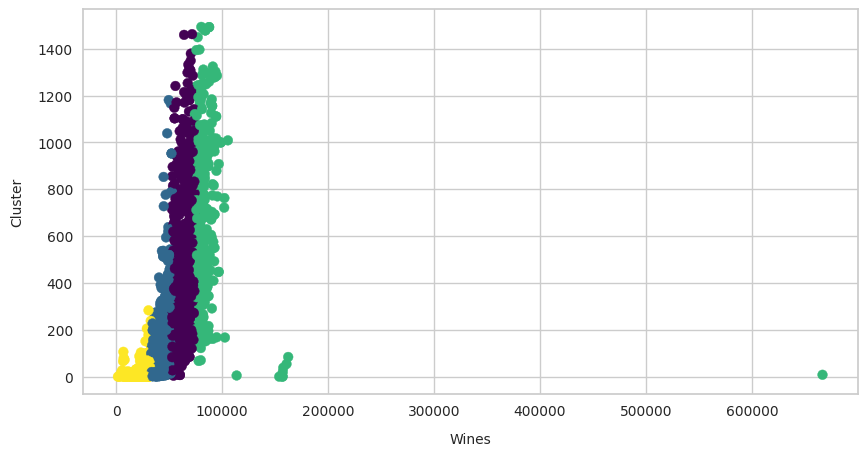

In [82]:
plt.figure(figsize=(10,5))
plt.scatter(data=clustered_df6, x='Income', y='MntWines', c='Class', cmap='viridis');
plt.xlabel('Wines', fontsize=10, labelpad=10)
plt.ylabel('Cluster', fontsize=10, labelpad=10);

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

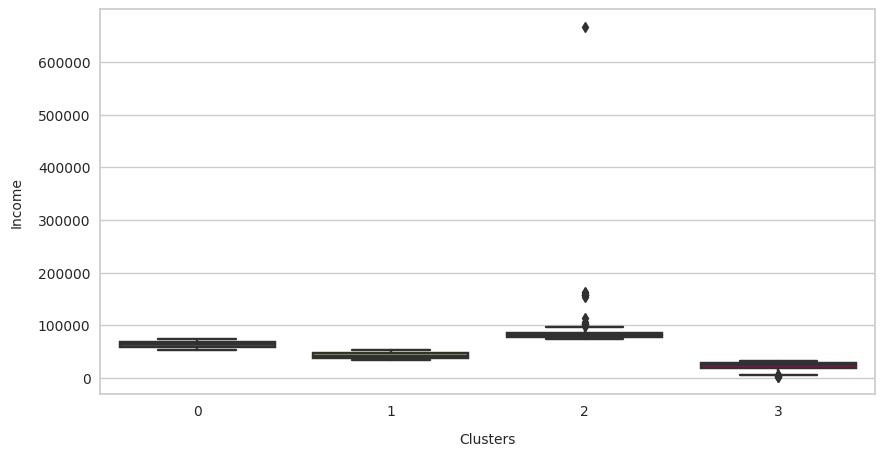

In [83]:
plt.figure(figsize=(10,5))

sns.boxplot(data=clustered_df6, x='Class', y = 'Income');
plt.xlabel('Clusters', fontsize=10, labelpad=10)
plt.ylabel('Income', fontsize=10, labelpad=10);

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

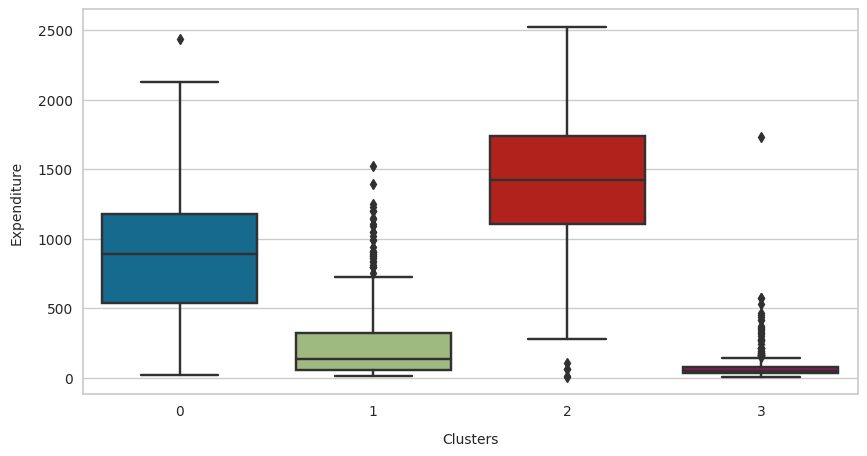

In [84]:
plt.figure(figsize=(10,5))

sns.boxplot(data=clustered_df6, x='Class', y = 'Expenditure');
plt.xlabel('Clusters', fontsize=10, labelpad=10)
plt.ylabel('Expenditure', fontsize=10, labelpad=10);

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

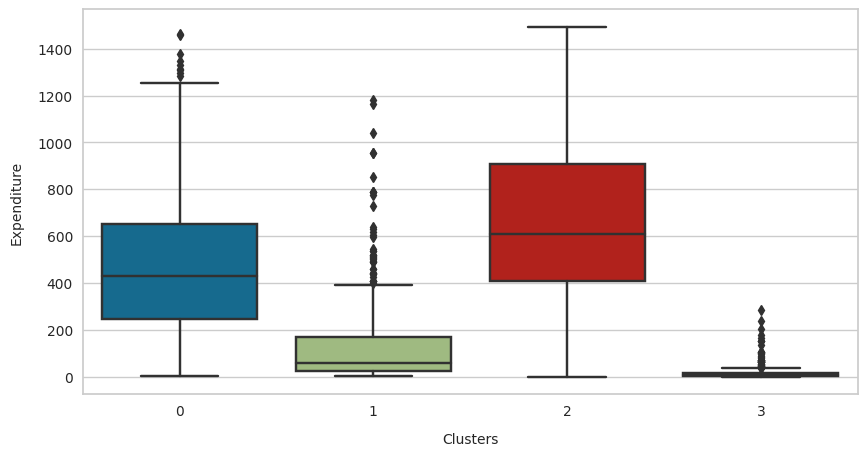

In [85]:
plt.figure(figsize=(10,5))

sns.boxplot(data=clustered_df6, x='Class', y = 'MntWines');
plt.xlabel('Clusters', fontsize=10, labelpad=10)
plt.ylabel('Expenditure', fontsize=10, labelpad=10);

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

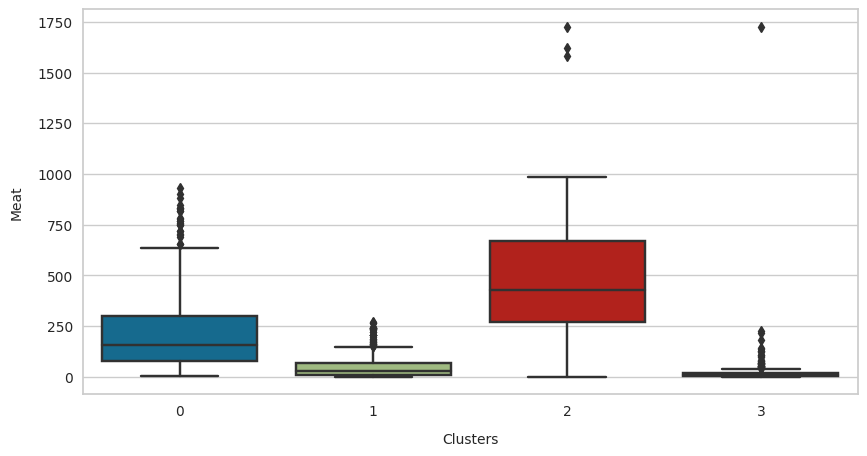

In [86]:
plt.figure(figsize=(10,5))

sns.boxplot(data=clustered_df6, x='Class', y = 'MntMeatProducts');
plt.xlabel('Clusters', fontsize=10, labelpad=10)
plt.ylabel('Meat', fontsize=10, labelpad=10);

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

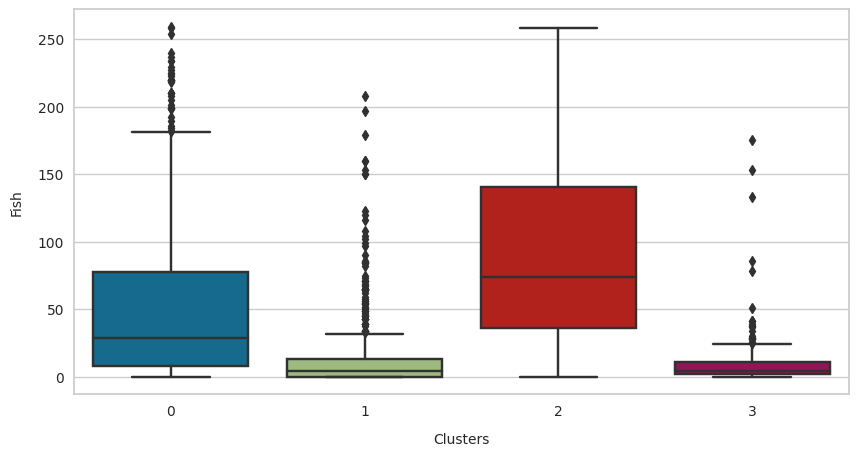

In [87]:
plt.figure(figsize=(10,5))

sns.boxplot(data=clustered_df6, x='Class', y = 'MntFishProducts');
plt.xlabel('Clusters', fontsize=10, labelpad=10)
plt.ylabel('Fish', fontsize=10, labelpad=10);

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

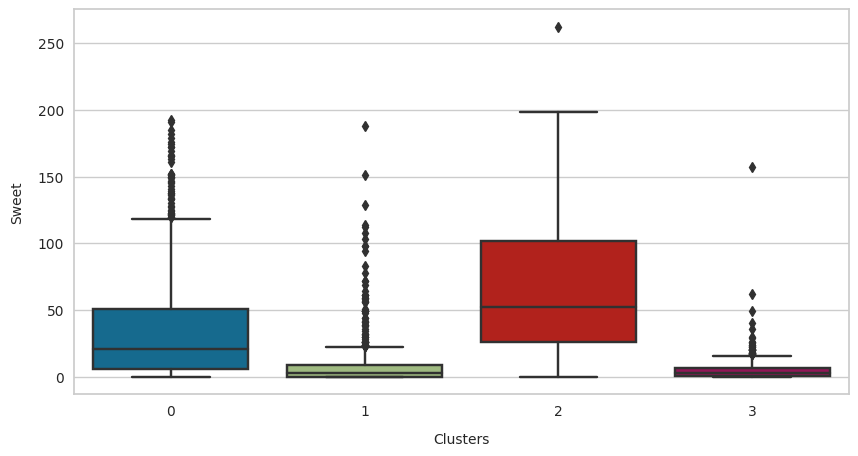

In [88]:
plt.figure(figsize=(10,5))

sns.boxplot(data=clustered_df6, x='Class', y = 'MntSweetProducts');
plt.xlabel('Clusters', fontsize=10, labelpad=10)
plt.ylabel('Sweet', fontsize=10, labelpad=10);

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

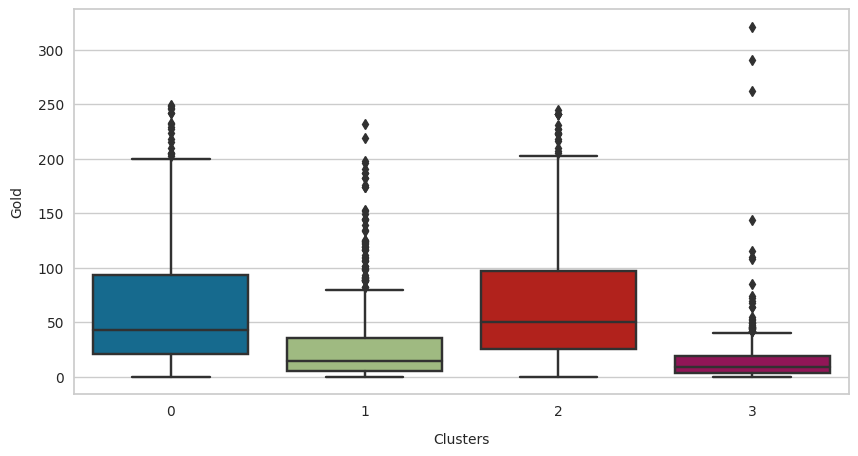

In [89]:
plt.figure(figsize=(10,5))
sns.boxplot(data=clustered_df6, x='Class', y = 'MntGoldProds');
plt.xlabel('Clusters', fontsize=10, labelpad=10)
plt.ylabel('Gold', fontsize=10, labelpad=10);

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

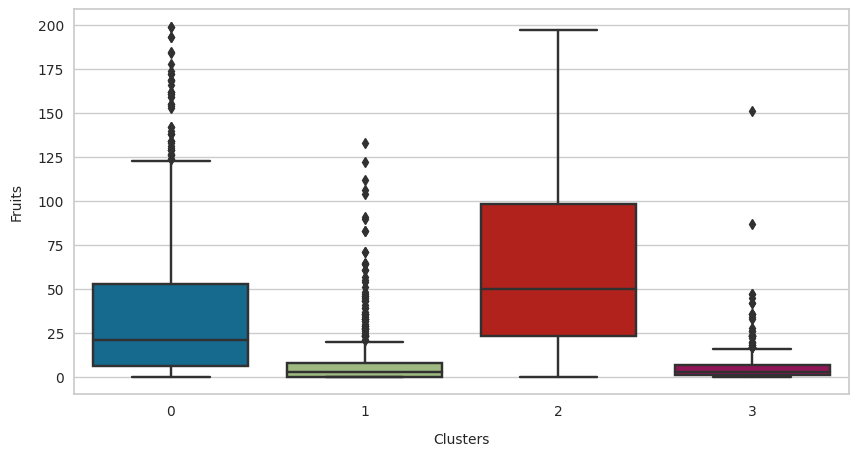

In [90]:
plt.figure(figsize=(10,5))
sns.boxplot(data=clustered_df6, x='Class', y = 'MntFruits');
plt.xlabel('Clusters', fontsize=10, labelpad=10)
plt.ylabel('Fruits', fontsize=10, labelpad=10);

In [91]:
clustered_df6.loc[clustered_df6['Class']==0].describe().iloc[1:, 1:-1]

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Expenditure
mean,2.527457,3.692197,63336.936416,0.195087,0.706647,482.323699,37.382948,214.117052,51.365607,36.807803,63.621387,2.748555,5.635838,3.789017,7.973988,4.582370,885.618497
std,1.088340,1.112641,6019.580751,0.428141,0.518052,297.583440,42.799021,182.890015,58.209220,42.349682,56.748956,2.149361,2.526339,2.366309,2.876003,2.008774,457.421673
min,0.000000,0.000000,52845.000000,0.000000,0.000000,5.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,16.000000
25%,2.000000,3.000000,58106.250000,0.000000,0.000000,247.000000,6.000000,76.000000,8.000000,6.000000,20.750000,1.000000,4.000000,2.000000,6.000000,3.000000,540.250000
50%,2.000000,3.000000,63392.500000,0.000000,1.000000,431.500000,21.000000,158.500000,29.000000,21.000000,43.000000,2.000000,5.000000,3.000000,8.000000,5.000000,886.500000
75%,4.000000,5.000000,68634.000000,0.000000,1.000000,653.250000,53.000000,300.000000,77.250000,51.000000,93.000000,4.000000,7.000000,5.000000,10.000000,6.000000,1180.000000
max,4.000000,6.000000,74068.000000,2.000000,2.000000,1462.000000,199.000000,932.000000,259.000000,192.000000,249.000000,15.000000,11.000000,11.000000,13.000000,9.000000,2440.000000


In [92]:
clustered_df6.loc[clustered_df6['Class']==1].describe().iloc[1:, 1:-1]

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Expenditure
mean,2.527778,3.745614,42289.400585,0.665205,0.656433,123.979532,8.071637,47.413743,13.372807,8.956140,27.94883,2.669591,3.301170,1.143275,4.194444,6.358187,229.742690
std,1.096028,1.092860,5738.578399,0.541583,0.538777,160.776009,15.662878,51.550114,25.878982,18.618804,36.62143,1.839587,2.274681,1.507404,1.995287,1.616734,242.867842
min,0.000000,1.000000,32871.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,2.000000,1.000000,8.000000
25%,2.000000,3.000000,37241.750000,0.000000,0.000000,23.000000,0.000000,11.000000,0.000000,0.000000,5.00000,1.000000,2.000000,0.000000,3.000000,5.000000,55.000000
50%,2.000000,4.000000,42165.500000,1.000000,1.000000,58.500000,3.000000,27.000000,4.000000,3.000000,15.00000,2.000000,3.000000,1.000000,4.000000,7.000000,134.000000
75%,3.000000,5.000000,46987.500000,1.000000,1.000000,171.250000,8.000000,66.000000,13.000000,9.000000,35.25000,4.000000,5.000000,1.000000,5.000000,8.000000,324.500000
max,4.000000,7.000000,52750.000000,2.000000,2.000000,1181.000000,133.000000,271.000000,208.000000,188.000000,232.00000,13.000000,11.000000,11.000000,13.000000,10.000000,1526.000000


In [93]:
clustered_df6.loc[clustered_df6['Class']==2].describe().iloc[1:, 1:-1]

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Expenditure
mean,2.455263,3.765789,84918.686842,0.078947,0.228947,655.855263,64.034211,472.402632,91.657895,67.489474,70.368421,1.276316,5.231579,6.052632,8.234211,2.660526,1421.807895
std,1.111513,1.075213,32195.961034,0.270012,0.456792,340.463052,50.729937,265.991744,67.028752,53.763750,60.522710,1.449217,2.497292,3.073827,3.006657,1.760912,463.715854
min,0.000000,0.000000,74116.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,2.000000,3.000000,77556.000000,0.000000,0.000000,407.750000,23.000000,272.750000,36.000000,26.000000,26.000000,1.000000,4.000000,4.000000,6.000000,1.000000,1108.000000
50%,2.000000,4.000000,80930.000000,0.000000,0.000000,610.500000,50.000000,430.000000,74.000000,52.000000,50.500000,1.000000,5.000000,6.000000,8.000000,2.000000,1425.500000
75%,3.000000,5.000000,85444.500000,0.000000,0.000000,908.500000,98.250000,672.000000,140.500000,102.000000,97.250000,1.000000,6.000000,7.000000,11.000000,4.000000,1739.250000
max,4.000000,6.000000,666666.000000,1.000000,2.000000,1493.000000,197.000000,1725.000000,258.000000,262.000000,245.000000,15.000000,27.000000,28.000000,13.000000,9.000000,2525.000000


In [94]:
clustered_df6.loc[clustered_df6['Class']==3].describe().iloc[1:, 1:-1]

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Expenditure
mean,1.943478,3.715217,23381.952174,0.780435,0.206522,18.017391,5.830435,21.630435,8.441304,5.767391,16.400000,2.034783,1.971739,0.467391,2.910870,7.078261,76.086957
std,1.116845,1.002930,6826.900271,0.477885,0.415863,30.636951,10.728251,83.448903,15.081725,9.935753,28.007795,1.640609,1.921460,1.423818,0.958105,2.117045,111.918042
min,0.000000,2.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,1.000000,3.000000,19397.000000,1.000000,0.000000,4.000000,1.000000,6.000000,2.000000,1.000000,4.000000,1.000000,1.000000,0.000000,2.000000,6.000000,31.000000
50%,2.000000,4.000000,24457.000000,1.000000,0.000000,9.000000,3.000000,11.000000,4.000000,3.000000,9.500000,2.000000,2.000000,0.000000,3.000000,7.000000,50.000000
75%,2.000000,5.000000,28729.500000,1.000000,0.000000,18.000000,7.000000,19.000000,11.000000,7.000000,19.000000,3.000000,2.000000,1.000000,3.000000,8.000000,77.250000
max,4.000000,6.000000,32765.000000,2.000000,2.000000,284.000000,151.000000,1725.000000,175.000000,157.000000,321.000000,15.000000,25.000000,28.000000,9.000000,20.000000,1730.000000


#### **Case 3**
##### **Obtained Clusters : 4**
##### **Silhouette Score : 0.2094**
##### **Process:**
* Molded Education in Basic/Advanced
* Marital status - Single/Couple
* Kids - Sum of kidhome and teenhome
* Filled NaN in Income
* Dropped outliers from Income
* Expenditure - Sum of all amounts
* Total accepted cmp - Sum of all cmps
* Extracted Age from Year_Birth
* Calculated years engaged
* Label Encoding for Education/Marital_Status
* Scaling using StandardScaler()

In [95]:
df_vis["Education"]

ID
5524     Graduation
2174     Graduation
4141     Graduation
6182     Graduation
5324            PhD
            ...    
9432     Graduation
10870    Graduation
7270     Graduation
8235         Master
9405            PhD
Name: Education, Length: 2058, dtype: object

In [96]:
df_vis["Education"]=df_vis["Education"].replace({"Basic":"Basic",
                                         "2n Cycle":"Advanced", 
                                         "Graduation":"Advanced", 
                                         "Master":"Advanced", 
                                         "PhD":"Advanced"})

In [97]:
df_vis["Marital_Status"]=df_vis["Marital_Status"].replace({"Married":"Couple", 
                                                   "Together":"Couple", 
                                                   "Absurd":"Single", 
                                                   "Widow":"Single", 
                                                   "YOLO":"Single", 
                                                   "Divorced":"Single", 
                                                   "Alone":"Single"})

In [98]:
df_vis['Kids'] = df_vis['Kidhome'] + df_vis['Teenhome']

In [99]:
df_vis['Income'].fillna((df_vis['Income'].mean()), inplace=True)
df_vis = df_vis.drop((df_vis.loc[df_vis["Income"]>600000].index))

In [100]:
df_vis["Expenditure"] = df_vis["MntWines"]+ df_vis["MntFruits"]+ df_vis["MntMeatProducts"]+ df_vis["MntFishProducts"]+ df_vis["MntSweetProducts"]+ df_vis["MntGoldProds"]

In [101]:
df_vis['AcceptedCmp'] = df_vis['AcceptedCmp1'] + df_vis['AcceptedCmp2'] + df_vis['AcceptedCmp3'] + df_vis['AcceptedCmp4'] + df_vis['AcceptedCmp5']

In [102]:
df_vis['Age'] = 2021 - df_vis["Year_Birth"]

In [103]:
df_vis["Dt_year"] = 2021 - pd.to_datetime(df_vis["Dt_Customer"]).dt.year

In [104]:
cols = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "Dt_Customer", "Recency", "Complain"]
df_vis=df_vis.drop(columns=cols,axis=1)

In [105]:
df_vis

,Year_Birth,Education,Marital_Status,Income,TotalAcceptedCmp,Age,Kids,Expenditure,AcceptedCmp,Dt_year
ID,,,,,,,,,,
5524,1957,Advanced,Single,58138.0,1,64,0,1617,0,9
2174,1954,Advanced,Single,46344.0,0,67,2,27,0,7
4141,1965,Advanced,Couple,71613.0,0,56,0,776,0,8
6182,1984,Advanced,Couple,26646.0,0,37,1,53,0,7
5324,1981,Advanced,Couple,58293.0,0,40,1,422,0,7
...,...,...,...,...,...,...,...,...,...,...
8080,1986,Advanced,Single,26816.0,0,35,0,22,0,9
10870,1967,Advanced,Couple,61223.0,0,54,1,1341,0,8
7270,1981,Advanced,Single,56981.0,1,40,0,1241,1,7


In [106]:
catg_cols = [col for col in df_vis.columns.tolist() if df_vis[col].dtype in ['object']]

le = LabelEncoder()
for col in catg_cols:
  df_vis[col] = df_vis[[col]].apply(le.fit_transform)

In [107]:
scaled_feature = StandardScaler().fit_transform(df_vis.values)
scaled_df = pd.DataFrame(scaled_feature, index=df_vis.index, columns=df_vis.columns)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

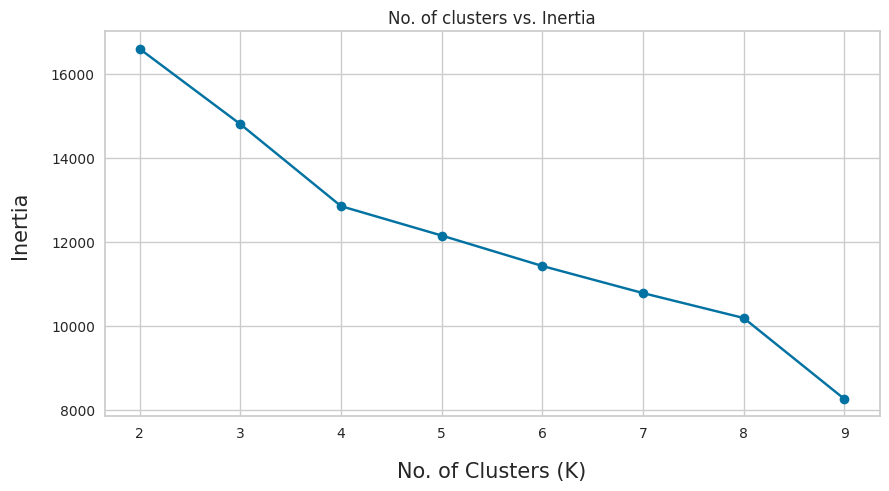

In [108]:
options = range(2,10)
kval = []
q = []
for n in options:
    initrain = d4p.kmeans_init(n)
    initrain_result = initrain.compute(scaled_df.values)
    algo = d4p.kmeans(nClusters=n, maxIterations =10 , accuracyThreshold =1, gamma =10)
    # compute the clusters/centroids
    result = algo.compute(scaled_df.values, initrain_result.centroids)
    kval.append(result.objectiveFunction)


for x in range(len(kval)):
    q.append(kval[x][0][0])

plt.figure(figsize=(10,5))    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, q, '-o')
plt.xticks( fontsize=10)
plt.yticks( fontsize=10)
plt.xlabel('No. of Clusters (K)', fontsize=15, labelpad=15)
plt.ylabel('Inertia', fontsize=15, labelpad=15);

In [109]:
    initrain = d4p.kmeans_init(4)
    initrain_result = initrain.compute(scaled_df.values)
    algo = d4p.kmeans(nClusters=4, maxIterations =10 , accuracyThreshold =1, gamma =10)
    # compute the clusters/centroids
    result = algo.compute(scaled_df.values, initrain_result.centroids)
    metrics.silhouette_score(scaled_df.values, result.assignments)

0.16235149737759433

In [110]:
df_vis['cluster_label'] = result.assignments

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

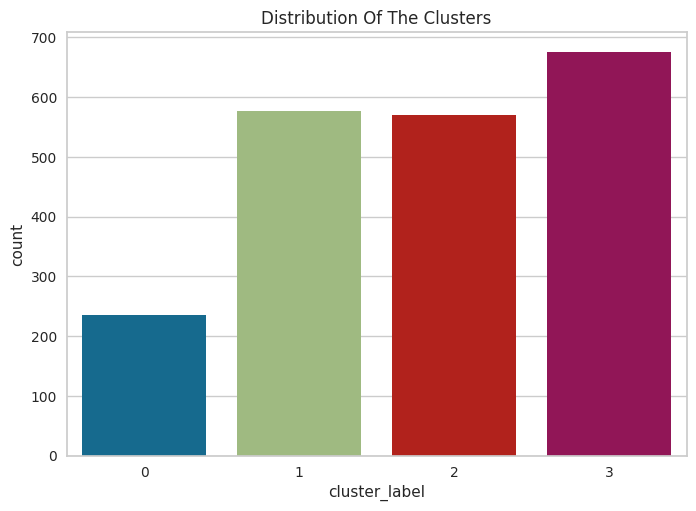

In [111]:
fig = sns.countplot(x=df_vis["cluster_label"])
fig.set_title("Distribution Of The Clusters")
plt.show()

In [112]:
df_vis.groupby('cluster_label').count()

,Year_Birth,Education,Marital_Status,Income,TotalAcceptedCmp,Age,Kids,Expenditure,AcceptedCmp,Dt_year
cluster_label,,,,,,,,,,
0,236,236,236,236,236,236,236,236,236,236
1,576,576,576,576,576,576,576,576,576,576
2,570,570,570,570,570,570,570,570,570,570
3,675,675,675,675,675,675,675,675,675,675


#### **Income Prediction**

In [113]:
 wi_df = df.copy()
 wi_df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Expenditure
0,1957,2,4,58138.0,0,0,635,88,546,172,88,88,3,8,10,4,7,1617
1,1954,2,4,46344.0,1,1,11,1,6,2,1,6,2,1,1,2,5,27
2,1965,2,5,71613.0,0,0,426,49,127,111,21,42,1,8,2,10,4,776
3,1984,2,5,26646.0,1,0,11,4,20,10,3,5,2,2,0,4,6,53
4,1981,4,3,58293.0,1,0,173,43,118,46,27,15,5,5,3,6,5,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,2,3,61223.0,0,1,709,43,182,42,118,247,2,9,3,4,5,1341
2236,1946,4,5,64014.0,2,1,406,0,30,0,0,8,7,8,2,5,7,444
2237,1981,2,2,56981.0,0,0,908,48,217,32,12,24,1,2,3,13,6,1241
2238,1956,3,5,69245.0,0,1,428,30,214,80,30,61,2,6,5,10,3,843


In [114]:
wi_df.drop(columns=['Income'], inplace=True)
wi_df

,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Expenditure
0,1957,2,4,0,0,635,88,546,172,88,88,3,8,10,4,7,1617
1,1954,2,4,1,1,11,1,6,2,1,6,2,1,1,2,5,27
2,1965,2,5,0,0,426,49,127,111,21,42,1,8,2,10,4,776
3,1984,2,5,1,0,11,4,20,10,3,5,2,2,0,4,6,53
4,1981,4,3,1,0,173,43,118,46,27,15,5,5,3,6,5,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,2,3,0,1,709,43,182,42,118,247,2,9,3,4,5,1341
2236,1946,4,5,2,1,406,0,30,0,0,8,7,8,2,5,7,444
2237,1981,2,2,0,0,908,48,217,32,12,24,1,2,3,13,6,1241
2238,1956,3,5,0,1,428,30,214,80,30,61,2,6,5,10,3,843


In [115]:
values8 = wi_df.values

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

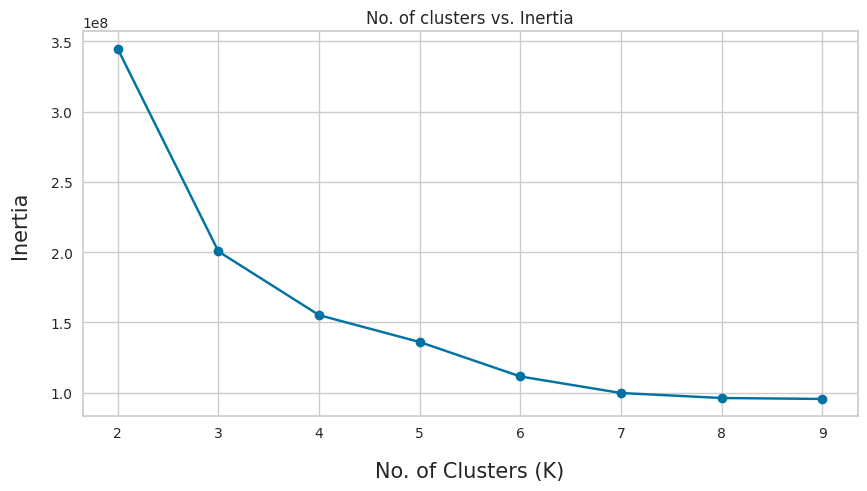

In [116]:
options = range(2,10)
kval = []
q = []
for n in options:
    initrain = d4p.kmeans_init(n)
    initrain_result = initrain.compute(values8)
    algo = d4p.kmeans(nClusters=n, maxIterations =10 , accuracyThreshold =1, gamma =10)
    # compute the clusters/centroids
    result = algo.compute(values8, initrain_result.centroids)
    kval.append(result.objectiveFunction)


for x in range(len(kval)):
    q.append(kval[x][0][0])

plt.figure(figsize=(10,5))    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, q, '-o')
plt.xticks( fontsize=10)
plt.yticks( fontsize=10)
plt.xlabel('No. of Clusters (K)', fontsize=15, labelpad=15)
plt.ylabel('Inertia', fontsize=15, labelpad=15);

In [117]:
    initrain = d4p.kmeans_init(3)
    initrain_result = initrain.compute(values8)
    algo = d4p.kmeans(nClusters=3, maxIterations =10 , accuracyThreshold =1, gamma =10)
    # compute the clusters/centroids
    result = algo.compute(values8, initrain_result.centroids)
    metrics.silhouette_score(values8, result.assignments)

0.5891107778427913

In [118]:
clustered_df8 = df.copy()
clustered_df8['Class']=result.assignments
clustered_df8

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Expenditure,Class
0,1957,2,4,58138.0,0,0,635,88,546,172,88,88,3,8,10,4,7,1617,0
1,1954,2,4,46344.0,1,1,11,1,6,2,1,6,2,1,1,2,5,27,1
2,1965,2,5,71613.0,0,0,426,49,127,111,21,42,1,8,2,10,4,776,2
3,1984,2,5,26646.0,1,0,11,4,20,10,3,5,2,2,0,4,6,53,1
4,1981,4,3,58293.0,1,0,173,43,118,46,27,15,5,5,3,6,5,422,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,2,3,61223.0,0,1,709,43,182,42,118,247,2,9,3,4,5,1341,0
2236,1946,4,5,64014.0,2,1,406,0,30,0,0,8,7,8,2,5,7,444,1
2237,1981,2,2,56981.0,0,0,908,48,217,32,12,24,1,2,3,13,6,1241,0
2238,1956,3,5,69245.0,0,1,428,30,214,80,30,61,2,6,5,10,3,843,2


In [119]:
len(df)

2216

In [120]:
catg = [col for col in df_subset.columns.tolist() if df_subset[col].dtype in ['object']]
print(catg)

['Education', 'Marital_Status']


In [121]:
sub_copy = df_subset.copy()

In [122]:
le = LabelEncoder()
for col in catg:
  sub_copy[col] = sub_copy[[col]].apply(le.fit_transform)
  #df_subset[col] = df_subset[[col]].apply(le.fit_transform)

print("Dataset after encoding of Categorical Columns")
print("---------------------------------------------")
sub_copy

Dataset after encoding of Categorical Columns
---------------------------------------------


,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalAcceptedCmp,Age
0,1957,0,2,0,0,635,88,546,172,88,88,3,8,10,4,7,NaN,NaN
1,1954,0,2,1,1,11,1,6,2,1,6,2,1,1,2,5,NaN,NaN
2,1965,0,1,0,0,426,49,127,111,21,42,1,8,2,10,4,NaN,NaN
3,1984,0,1,1,0,11,4,20,10,3,5,2,2,0,4,6,NaN,NaN
4,1981,1,1,1,0,173,43,118,46,27,15,5,5,3,6,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,0,1,0,1,709,43,182,42,118,247,2,9,3,4,5,NaN,NaN
2236,1946,1,1,2,1,406,0,30,0,0,8,7,8,2,5,7,NaN,NaN
2237,1981,0,2,0,0,908,48,217,32,12,24,1,2,3,13,6,NaN,NaN
2238,1956,1,1,0,1,428,30,214,80,30,61,2,6,5,10,3,NaN,NaN


In [123]:
val_pred = sub_copy.values
initrain = d4p.kmeans_init(3)
initrain_result = initrain.compute(val_pred)
algo = d4p.kmeans(nClusters=3, maxIterations =10 , accuracyThreshold =1, gamma =10)
result = algo.compute(val_pred, initrain_result.centroids)
df_subset['Class']=result.assignments


In [124]:
df_subset.values.dtype

dtype('O')

In [125]:
mean_income = pd.DataFrame(clustered_df8.groupby('Class').mean()['Income'])
mean_income

,Income
Class,
0,77220.895013
1,38120.063864
2,65558.911371
